<a href="https://colab.research.google.com/github/ashish-bansod/Netflix_Movies_and_TV_Shows_Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Netflix Movies and TV Shows Clustering**



## **Project Type**    - *Unsupervised*
## **Contribution**    - *Individual* - *Ashish Prakash Bansod*

# **Project Summary -**

The main objective of this project was to analyze a dataset of TV shows and movies available on Netflix as of 2019. By utilizing NLP techniques, our aim was to group the content into relevant clusters and create a recommendation system that would enhance the user experience and prevent subscriber churn. With over 200 million subscribers, Netflix is the largest online streaming service provider, and it is crucial to continually improve its offerings.

* We began by addressing missing values in the dataset and handling nested columns such as director, cast, listed_in, and country. This allowed for a more organized and comprehensive analysis of the data.

* To categorize the content effectively, we binned the rating attribute into appropriate categories, including adult, children's, family-friendly, and not rated content. This classification helps in delivering targeted recommendations based on viewer preferences and age appropriateness.

* Exploratory data analysis (EDA) was conducted to gain valuable insights into various attributes within the dataset. This process involved examining patterns, distributions, and relationships in the data, providing a deeper understanding of the content available on Netflix.

* To create clusters, we employed NLP techniques by tokenizing, preprocessing, and vectorizing attributes such as director, cast, country, genre, rating, and description using the TFIDF vectorizer. This allowed us to quantify textual data and identify similarities among TV shows and movies.

* Dimensionality reduction was performed using Principal Component Analysis (PCA) to improve performance and computational efficiency.

* Two clustering algorithms, namely K-Means Clustering and Agglomerative Hierarchical Clustering, were used to create distinct clusters within the data. The optimal number of clusters was determined using evaluation metrics such as the Elbow method, Silhouette score, and dendrogram analysis.

* Finally, we developed a content-based recommender system using the cosine similarity matrix. This system analyzed the user's viewing history and provided personalized recommendations based on similarities with other content. By delivering tailored suggestions, the recommender system aimed to improve user satisfaction and reduce churn.

In conclusion, this project successfully analyzed the Netflix dataset of TV shows and movies using NLP techniques. By clustering the content and developing a content-based recommender system, we aimed to enhance the user experience and mitigate subscriber churn for Netflix. The findings and recommendations from this project can contribute to the continuous growth and success of Netflix in the highly competitive streaming entertainment industry.

# **GitHub Link -**

https://github.com/ashish-bansod/Netflix_Movies_and_TV_Shows_Clustering

# **Problem Statement**


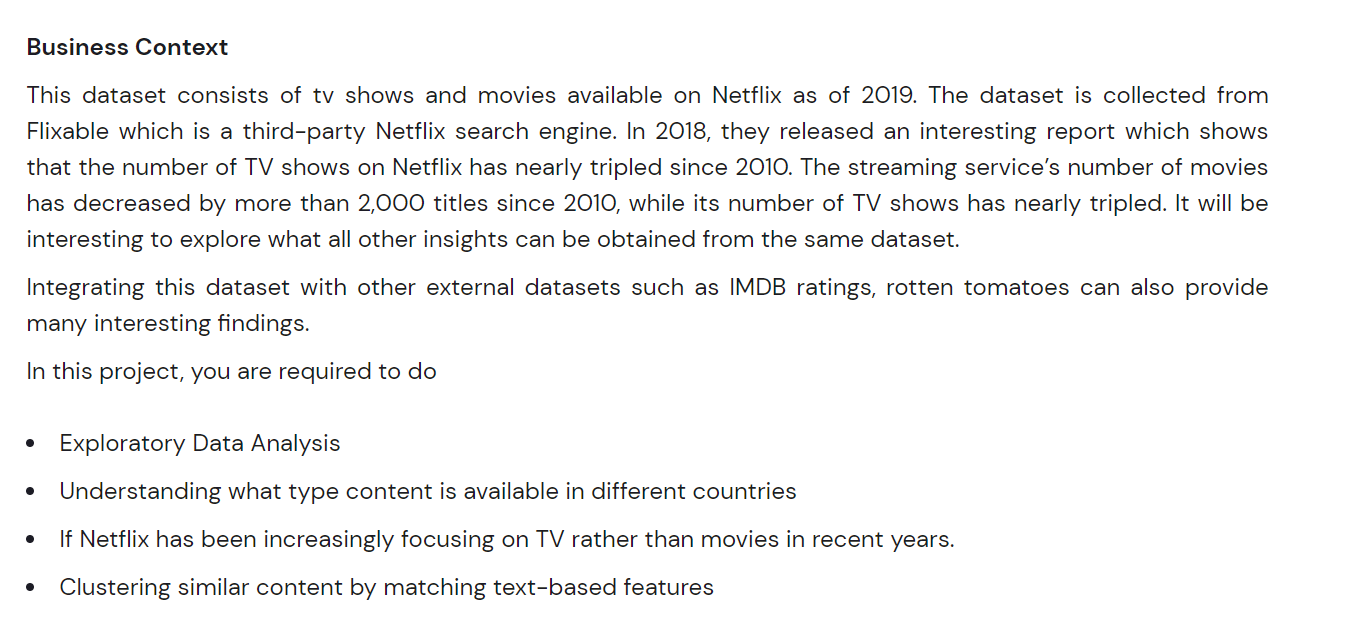

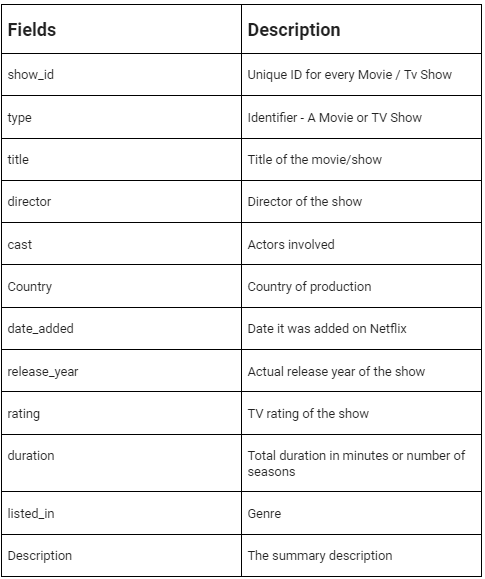

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [91]:
# Import Libraries

# Data Maipulation Libraries
import numpy as np
import pandas as pd
import datetime as dt

# Data Visualisation Libraray
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
%matplotlib inline

# libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# libraries used to implement clusters
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Dataset Loading

In [92]:
# Load Dataset
df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [93]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [94]:
# Dataset Rows & Columns count

df.shape

(7787, 12)

### Dataset Information

In [95]:
# Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [96]:
# Dataset Duplicate Value Count

df.duplicated().sum()

0

In [97]:
print(f' We have {df.duplicated().sum()} duplicate values in dataset.')

 We have 0 duplicate values in dataset.


#### Missing Values/Null Values

In [98]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False)

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

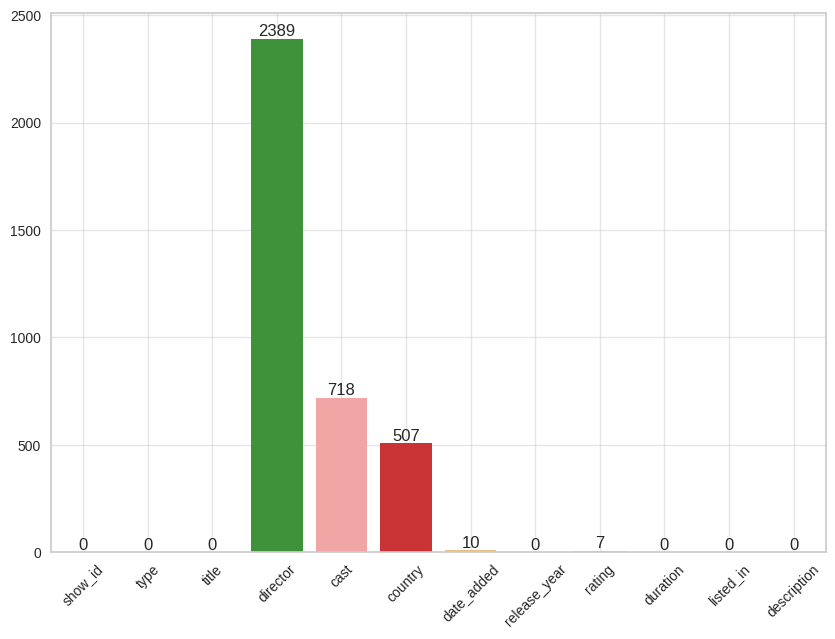

In [99]:
# Visualizing the missing values

plt.figure(figsize=(10,7))
ax=sns.barplot(x=df.columns,y=df.isna().sum(),palette='Paired')
for label in ax.containers:
    ax.bar_label(label)
plt.grid(alpha=0.5)
plt.xticks(rotation=45)
plt.show()

### What did you know about your dataset?

The dataset for Netflix Movies and TV Shows Clustering is comprised of 12 columns, with just a single column having an integer data type. It's worth noting that the dataset does not include any duplicate values. Nevertheless, there are null values present in five columns, namely director, cast, country, date_added, and rating.


## ***2. Understanding Your Variables***

In [100]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [101]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

1. **show_id**: Unique identifier for each movie/show.

2. **type**: Indicates whether the entry is a movie or a TV show.
3. **title**: Name of the movie or TV show.
4. **director**: Name of the director(s) of the movie or TV show.
5. **cast**: Names of the actors and actresses featured in the movie or TV show.
6. **country**: Country or countries where the movie or TV show was produced.
7. **date_added**: Date when the movie or TV show was added to Netflix.
8. **release_year**: Year when the movie or TV show was released.
9. **rating**: TV rating or movie rating of the movie or TV show.
10. **duration**: Length of the movie or TV show in minutes or seasons.
11. **listed_in**: Categories or genres of the movie or TV show.
12. **description**: Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [102]:
# Check Unique Values for each variable.
df.nunique().sort_values()

type               2
rating            14
release_year      73
duration         216
listed_in        492
country          681
date_added      1565
director        4049
cast            6831
description     7769
show_id         7787
title           7787
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

### 1. Handling null values

In [103]:
df.isna().sum().sort_values(ascending=False)

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

1. To handle null values in the 'director' and 'cast' columns, we can replace them with the value 'Unknown'. This ensures that missing information in these columns is still captured in the dataset.
2. For the 'country' column, we can fill the null values with the country that appears most frequently in the dataset, using the mode.
3. Since the 'date_added' and 'rating' columns have a relatively small number of null values, an alternative approach would be to drop the observations (rows) that have null values in these columns from our analysis.

In [104]:
df[['director','cast']]=df[['director','cast']].fillna('Unknown')
df['country']=df['country'].fillna(df['country'].mode()[0])
df.dropna(axis=0, inplace=True)

In [105]:
df.shape

(7770, 12)

In [106]:
df.duplicated().sum()

0

### 2. Handling nested columns i.e 'director', 'cast', 'listed_in' and 'country'

In [107]:
# Let's create a copy of dataframe and unnest the original one
df_new= df.copy()

In [108]:
# Unnesting 'Directors' column
dir=df['director'].apply(lambda x: str(x).split(',')).tolist()
df1=pd.DataFrame(dir,index=df['title'])
df1=df1.stack()
df1=pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'Directors'},inplace=True)
df1 = df1.drop(['level_1'],axis=1)
df1.sample(10)

,title,Directors
7168,The Light of My Eyes,Unknown
6398,Super Monsters: Dia de los Monsters,Unknown
1843,Desperados,LP
7317,The Other Guys,Adam McKay
1232,Burning Sands,Gerard McMurray
8193,Weeds on Fire,Chi Fat Chan
5738,Rurouni Kenshin,Unknown
8427,You Don't Mess with the Zohan,Dennis Dugan
5853,Saving Mr. Banks,John Lee Hancock
4047,Love Is in the Air,Unknown


In [109]:
df1.shape

(8487, 2)

In [110]:
# Unnesting 'cast' column
cast=df['cast'].apply(lambda x: str(x).split(',')).tolist()
df2=pd.DataFrame(cast,index=df['title'])
df2=df2.stack()
df2=pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Actors'},inplace=True)
df2 = df2.drop(['level_1'],axis=1)
df2.sample(10)

,title,Actors
16715,Fruitvale Station,Ariana Neal
211,#cats_the_mewvie,Unknown
25977,Leyla Everlasting,Hakan Eke
3830,Angel Beats!,Eri Kitamura
10450,Click for Murder,Donal MacIntyre
34500,Perfume,Natalia Belitski
53146,Uncertain Glory,Bruna Cusí
46165,The Great British Baking Show: Holidays,Paul Hollywood
45552,The Exception,Anton Lesser
54328,Wanderlust,Emma D'Arcy


In [111]:
df2.shape

(56563, 2)

In [112]:
# Unnesting 'listed_in' column
lst=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(lst, index = df['title'])
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Genre'},inplace=True)
df3 = df3.drop(['level_1'],axis=1)
df3.sample(10)

,title,Genre
16483,Westerplatte Resists,Dramas
9333,Mucize,Dramas
13147,Tellur Aliens,Children & Family Movies
11182,Raya and Sakina,International Movies
12455,Sol Levante,International Movies
522,A Sun,Independent Movies
12723,Stonehearst Asylum,Thrillers
7049,Juanita,Romantic Movies
12749,Stranger Things,TV Mysteries
8500,Making Unorthodox,Documentaries


In [113]:
df3.shape

(17042, 2)

In [114]:
# Unnesting 'country' column
country=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(country, index = df['title'])
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'Country'},inplace=True)
df4 = df4.drop(['level_1'],axis=1)
df4.sample(10)

,title,Country
6289,Ripper Street,United Kingdom
4432,Little Dragon Maiden,Hong Kong
3500,Huntik: Secrets and Seekers,Italy
4141,Knights of Sidonia,Japan
7786,The Great British Baking Show: Holidays,United States
2094,Devil's Bride,Norway
7883,The Inmate,Mexico
1333,Breath,Australia
3480,Hugo,France
5142,Mujeres arriba,Chile


In [115]:
df4.shape

(9553, 2)

In [116]:
# Merging all the unnested dataframes

# Merging director and cast
df5 = df2.merge(df1,on=['title'],how='inner')

# Merging listed_in with merged of (director and cast)
df6 = df5.merge(df3,on=['title'],how='inner')

# Merging country with merged of [listed_in with merged of (director and cast)]
df7 = df6.merge(df4,on=['title'],how='inner')

# Head of final merged dataframe
df7.head()

,title,Actors,Directors,Genre,Country
0,3%,João Miguel,Unknown,International TV Shows,Brazil
1,3%,João Miguel,Unknown,TV Dramas,Brazil
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil


In [117]:
# Final DataFrame:
df=df7.merge(df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration','description']],on=['title'],how='left')
df.head(10)

,title,Actors,Directors,Genre,Country,type,date_added,release_year,rating,duration,description
0,3%,João Miguel,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
1,3%,João Miguel,Unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
5,3%,Bianca Comparato,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
6,3%,Michel Gomes,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
7,3%,Michel Gomes,Unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
8,3%,Michel Gomes,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
9,3%,Rodolfo Valente,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...


In [118]:
df.shape

(175807, 11)

### 3. Changing datatype

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175807 entries, 0 to 175806
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175807 non-null  object
 1   Actors        175807 non-null  object
 2   Directors     175807 non-null  object
 3   Genre         175807 non-null  object
 4   Country       175807 non-null  object
 5   type          175807 non-null  object
 6   date_added    175807 non-null  object
 7   release_year  175807 non-null  int64 
 8   rating        175807 non-null  object
 9   duration      175807 non-null  object
 10  description   175807 non-null  object
dtypes: int64(1), object(10)
memory usage: 16.1+ MB


In [120]:
# 'date_added' column:
df['date_added']=pd.to_datetime(df['date_added'])
# Extracting  day, month and year from date_added column
df["day_added"]= df["date_added"].dt.day
df["month_added"]= df["date_added"].dt.month
df["year_added"]= df["date_added"].dt.year

# Dropping date_added
df.drop('date_added', axis=1, inplace=True)

# removing 'min' and 'Seasons' from the end in 'duration' column:
df['duration']= df['duration'].apply(lambda x: int(x.split()[0]))

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175807 entries, 0 to 175806
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         175807 non-null  object
 1   Actors        175807 non-null  object
 2   Directors     175807 non-null  object
 3   Genre         175807 non-null  object
 4   Country       175807 non-null  object
 5   type          175807 non-null  object
 6   release_year  175807 non-null  int64 
 7   rating        175807 non-null  object
 8   duration      175807 non-null  int64 
 9   description   175807 non-null  object
 10  day_added     175807 non-null  int64 
 11  month_added   175807 non-null  int64 
 12  year_added    175807 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 18.8+ MB


In [170]:
df.head(10)

,title,Actors,Directors,Genre,Country,type,release_year,rating,duration,description,day_added,month_added,year_added
0,3%,João Miguel,Unknown,International TV Shows,Brazil,TV Show,2020,TV-MA,4,In a future where the elite inhabit an island ...,14,8,2020
1,3%,João Miguel,Unknown,TV Dramas,Brazil,TV Show,2020,TV-MA,4,In a future where the elite inhabit an island ...,14,8,2020
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,2020,TV-MA,4,In a future where the elite inhabit an island ...,14,8,2020
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil,TV Show,2020,TV-MA,4,In a future where the elite inhabit an island ...,14,8,2020
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil,TV Show,2020,TV-MA,4,In a future where the elite inhabit an island ...,14,8,2020
5,3%,Bianca Comparato,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,2020,TV-MA,4,In a future where the elite inhabit an island ...,14,8,2020
6,3%,Michel Gomes,Unknown,International TV Shows,Brazil,TV Show,2020,TV-MA,4,In a future where the elite inhabit an island ...,14,8,2020
7,3%,Michel Gomes,Unknown,TV Dramas,Brazil,TV Show,2020,TV-MA,4,In a future where the elite inhabit an island ...,14,8,2020
8,3%,Michel Gomes,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,2020,TV-MA,4,In a future where the elite inhabit an island ...,14,8,2020
9,3%,Rodolfo Valente,Unknown,International TV Shows,Brazil,TV Show,2020,TV-MA,4,In a future where the elite inhabit an island ...,14,8,2020


### 4. Binning of Rating variable

In rating columns we have different categories these are content rating classifications that are commonly used in the United States and other countries to indicate the appropriateness of media content for different age groups. Let's understand each of them and binnig them accordingly:

**TV-MA**: This rating is used for mature audiences only, and it may contain strong language, violence, nudity, and sexual content.

**R**: This rating is used for movies that are intended for audiences 17 and older. It may contain graphic violence, strong language, drug use, and sexual content.

**PG-13**: This rating is used for movies that may not be suitable for children under 13. It may contain violence, mild to moderate language, and suggestive content.

**TV-14**: This rating is used for TV shows that may not be suitable for children under 14. It may contain violence, strong language, sexual situations, and suggestive dialogue.

**TV-PG**: This rating is used for TV shows that may not be suitable for children under 8. It may contain mild violence, language, and suggestive content.

**NR**: This stands for "Not Rated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

**TV-G**: This rating is used for TV shows that are suitable for all ages. It may contain some mild violence, language, and suggestive content.

**TV-Y**: This rating is used for children's TV shows that are suitable for all ages. It is intended to be appropriate for preschool children.

**TV-Y7**: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain mild violence and scary content.

**PG**: This rating is used for movies that may not be suitable for children under 10. It may contain mild language, some violence, and some suggestive content.

**G**: This rating is used for movies that are suitable for general audiences. It may contain some mild language and some violence.

**NC-17**: This rating is used for movies that are intended for adults only. It may contain explicit sexual content, violence, and language.

**TV-Y7-FV**: This rating is used for children's TV shows that may not be suitable for children under 7. It may contain fantasy violence.

**UR**: This stands for "Unrated." It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.

Let's not complicate it and create bins as following:
* **Adult Content**: TV-MA, NC-17, R
* **Children Content**:  TV-PG, PG, TV-G, G
* **Teen Content**: PG-13, TV-14
* **Family-friendly Content**: TV-Y, TV-Y7, TV-Y7-FV
* **Not Rated**: NR, UR

In [172]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

df['rating'].replace(rating_map, inplace = True)
df['rating'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

In [173]:
df.sample(5)

,title,Actors,Directors,Genre,Country,type,release_year,rating,duration,description,day_added,month_added,year_added
21230,Black Mirror,Toby Kebbell,Unknown,British TV Shows,United Kingdom,TV Show,2019,Adult Content,5,This sci-fi anthology series explores a twiste...,5,6,2019
38908,Diablero,Quetzalli Cortés,Unknown,Spanish-Language TV Shows,Mexico,TV Show,2020,Adult Content,2,"When a young girl goes missing in a big city, ...",31,1,2020
58982,Haraamkhor,Mohd Samad,Shlok Sharma,International Movies,India,Movie,2015,Teen Content,93,"A selfish, manipulative schoolteacher takes ad...",1,2,2017
137064,The Chosen,Luis Rosales,Antonio Chavarrías,Dramas,Mexico,Movie,2016,Teen Content,111,"In 1937, Spanish revolutionary Ramón trains as...",14,4,2017
175560,Zoé: Panoramas,León Larregui,Gabriel Cruz Rivas,Music & Musicals,Mexico,Movie,2016,Adult Content,89,This introspective rockumentary follows the ca...,1,11,2019


### 5. Separating Movies and TV Shows

In [174]:
# Spearating the dataframes for further analysis
df_movies= df[df['type']== 'Movie']
df_tvshows= df[df['type']== 'TV Show']

# Printing the shape
print(df_movies.shape, df_tvshows.shape)

(126079, 13) (49728, 13)


### What all manipulations have you done and insights you found?

We have divided data wrangling into five different sections:
1. In this section we have imputed/drop the null values of:
  * Imputed 'director' and 'cast' with 'Unknown'.
  * Imputed 'country' with Mode.
  * Drop null values of 'date_added' and 'rating' .
2. We have unnested values from following features:
    * 'director'
    * 'cast'
    * 'listed_in'
    * 'country'

    We have unnested the values and stored in different dataframes and then  merged all the dataframe with the original one using left join in order to get the isolated values of each of the feature.
3.* We have changed  the data type of  following features:
    * 'duration' into integer (Removing min and seasons from the values).
    * 'date_added' to datetime (Into the required format).
  * We have also extracted the following features:
    * 'date' from 'date_added'.
    * 'month' from 'date_added'.
    * 'year' from 'date_added'.
4. We have seen that the 'rating' column contains various coded categories, so  we have decided to create 5 bins and distribute the values accordingly:
    * **Adult**: TV-MA, NC-17
    * **Restricted**: R, UR
    * **Teen**: PG-13, TV-14
    * **All Ages**: TV-G, TV-Y, TV-Y7, TV-Y7-FV, PG, G, TV-PG
    * **Not Rated**: NR
5. Lastly we have splitted the dataframe into two df one is 'df_movies' that contains only Movies and the other is 'df_tvshows' that contains only TV Shows for our further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Movie      126079
TV Show     49728
Name: type, dtype: int64


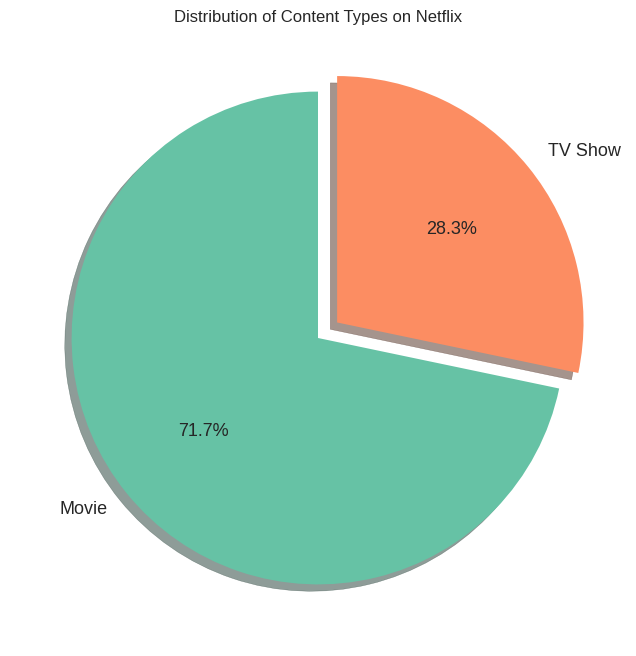

In [175]:
# Chart - 1 visualization code

print(df['type'].value_counts())

plt.figure(figsize=(12,8))
plt.pie(df['type'].value_counts(),labels=df['type'].value_counts().index, startangle=90,colors=sns.color_palette("Set2"),explode=[0,0.1],shadow=True,autopct="%1.1f%%",textprops = {'fontsize':13})
plt.title('Distribution of Content Types on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

This Chart  shows us the percentage  of TV shows and movies data present on Netflix Dataset.

##### 2. What is/are the insight(s) found from the chart?

The data reveals that movies constitute the predominant portion of Netflix's content, comprising approximately 71.7% of the total offerings. Conversely, TV shows account for the remaining 28.3% of the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights on Netflix's content distribution (71.7% movies, 28.3% TV shows) can guide strategic decisions in content acquisition, original production, user engagement, and targeted marketing, potentially leading to positive business impact.

#### Chart - 2

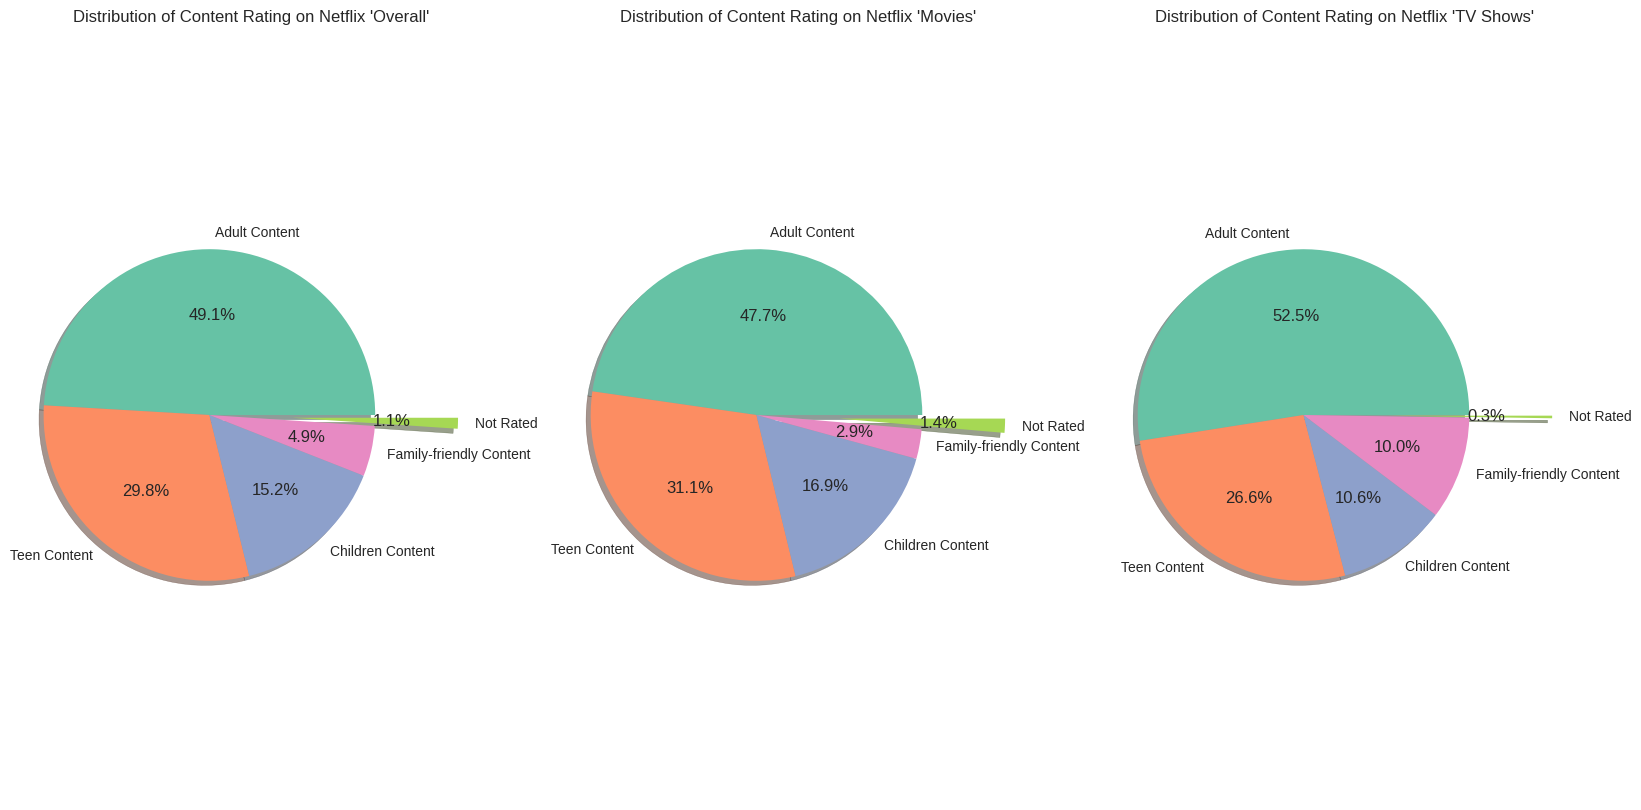

In [176]:
# Chart - 2 visualization code

plt.figure(figsize=(20, 10))
datasets = [(df, 'Overall'), (df_movies, 'Movies'), (df_tvshows, 'TV Shows')]

for i, (data, label) in enumerate(datasets):
    plt.subplot(1, 3, i+1)
    count = data['rating'].value_counts()
    plt.pie(count, labels=count.index, autopct='%1.1f%%',explode=(0,0,0,0,0.5),colors=sns.color_palette("Set2"),shadow=True)
    plt.title(f"Distribution of Content Rating on Netflix '{label}'")
    plt.axis('equal')

plt.show()


##### 1. Why did you pick the specific chart?

A pie chart, was utilized to analyze the distribution of content types within Netflix. Its purpose was to determine the percentage of each content type (movies and TV shows) present on the platform.

##### 2. What is/are the insight(s) found from the chart?

* The analysis revealed that the majority of content available on Netflix falls under the Adult and Teen categories. These two categories constitute a significant portion of the content library.

* A noteworthy finding is that, in comparison to TV shows, there is a relatively lower presence of family-friendly content in the Movies category on Netflix. This suggests that TV shows offer a greater selection of content suitable for family viewing

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights regarding the content distribution on Netflix, specifically the prevalence of Adult and Teen categories and the disparity in family-friendly content between Movies and TV Shows, can potentially create a positive business impact. By catering to the preferences of their target audience and strategically addressing the content gaps, Netflix can enhance user satisfaction, attract new subscribers, and ultimately drive business growth and success.

#### Chart - 3

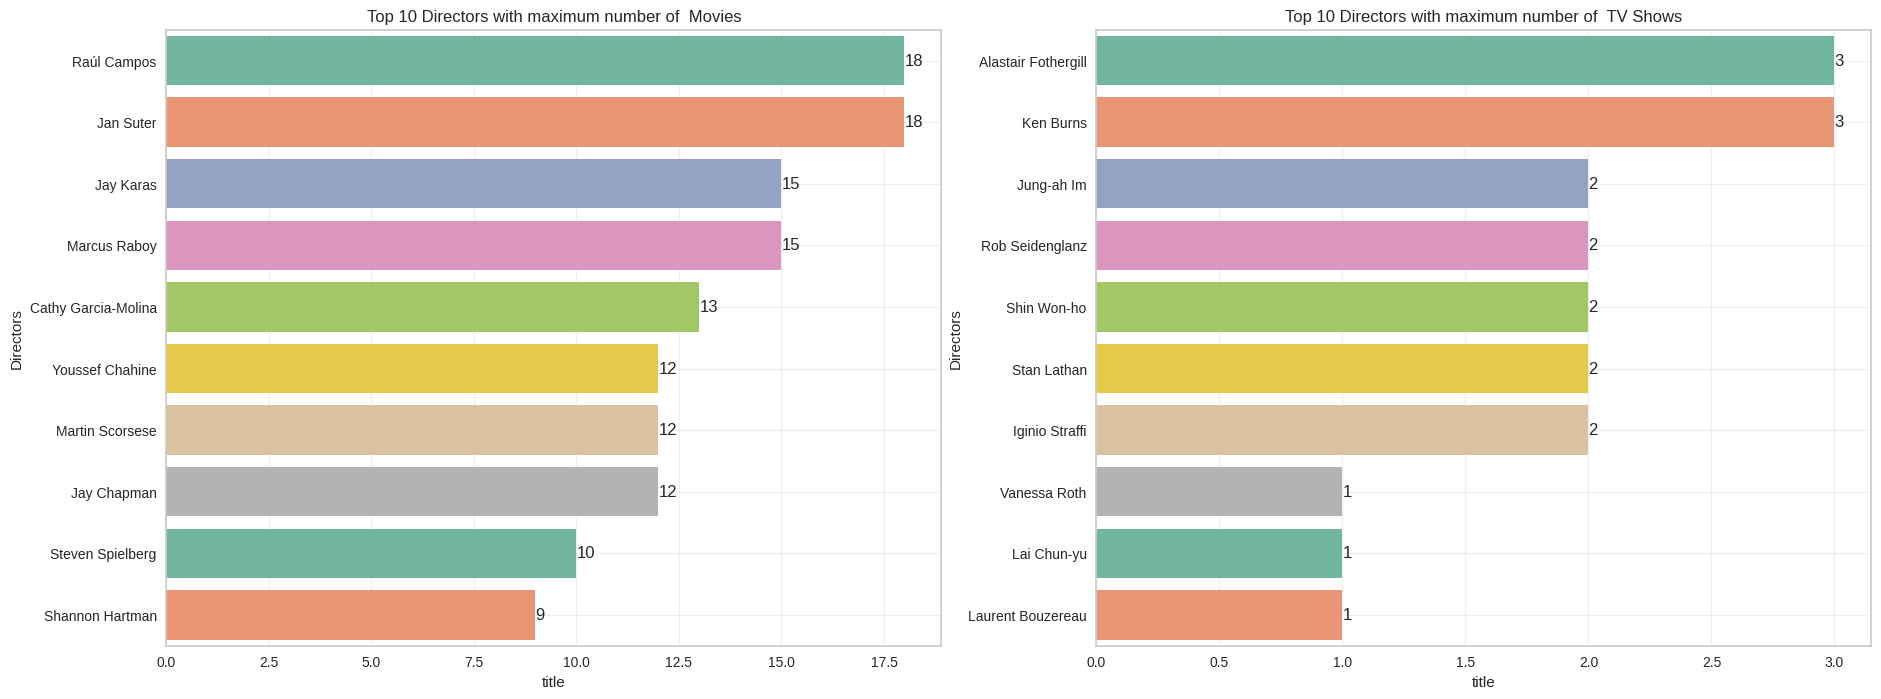

In [177]:
# Chart - 3 visualization code

plt.figure(figsize=(22,8))
for i,j,k in (df_movies,'Movies',1),(df_tvshows,'TV Shows',2):
  plt.subplot(1,2,k)
  k=sns.barplot(y='Directors',x='title',data=i.groupby(['Directors']).nunique().sort_values(by='title',ascending=False).reset_index()[1:11],palette='Set2')
  for label in k.containers:
            k.bar_label(label)
  plt.grid(alpha=0.3)
  plt.title(f'Top 10 Directors with maximum number of  {j}')
plt.show()

##### 1. Why did you pick the specific chart?

To know about the most popular Directors in  Movies and TV shows.

##### 2. What is/are the insight(s) found from the chart?

* We found that most of the movies directed by **Raul Campos** and **Jan Suter**.

* Most TV shows directed by **Alastair Fothergill** and **ken burns**.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Movie/tvshows producers can select the popular director for their upcoming projects.

#### Chart - 4

In [124]:
# Chart - 4 visualization code

plt.figure(figsize=(22,8))
for i,j,k in (df_movies,'Movies',1),(df_tvshows,'TV Shows',2):
  plt.subplot(1,2,k)
  k=sns.barplot(y='Actors',x='title',data=i.groupby('Actors').nunique().sort_values(by='title',ascending=False).reset_index()[1:11],palette='Set2')
  for label in k.containers:
            k.bar_label(label)
  plt.grid(alpha=0.3)
  plt.title(f'Top 10 Actors with maximum number of  {j}')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [125]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [126]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [127]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [128]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [129]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [130]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [131]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [132]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [133]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [134]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [135]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [136]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [137]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [138]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [139]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [140]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [141]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [142]:
# Expand Contraction

#### 2. Lower Casing

In [143]:
# Lower Casing

#### 3. Removing Punctuations

In [144]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [145]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [146]:
# Remove Stopwords

In [147]:
# Remove White spaces

#### 6. Rephrase Text

In [148]:
# Rephrase Text

#### 7. Tokenization

In [149]:
# Tokenization

#### 8. Text Normalization

In [150]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [151]:
# POS Taging

#### 10. Text Vectorization

In [152]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [153]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [154]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [155]:
# Transform Your data

### 6. Data Scaling

In [156]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [157]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [158]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [159]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [160]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [161]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [162]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [163]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [164]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [165]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [166]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [167]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [168]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [169]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***